In [8]:
# BNB/BTC Time series exploration 

In [9]:
# Step 1 import all the extensions

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [11]:
# change the data directory to the homework folder

In [36]:
os.chdir('C:\\Users\Boris\Desktop\Homework')
df = pd.read_csv('BNB-BTC-Test.csv')
df.head()

,Day,BTC Vol $,BNB Vol $,BTC Close,BTCDIFF,BNB Close,BNBDIFF,EX
0,2023-09-01,17202862221,438229562,25800.72,-0.013,213,-0.011,0.008279
1,2023-09-02,10100387473,291979876,25868.80,-0.013,214,-0.011,0.008290
2,2023-09-03,8962524523,264565518,25969.57,-0.013,214,-0.011,0.008252
3,2023-09-04,10680635106,364530693,25812.42,-0.013,215,-0.011,0.008335
4,2023-09-05,11094740040,298056096,25779.98,-0.013,214,-0.011,0.008318


In [13]:
# Exploratory Data Analysis

In [16]:
df.shape

(182, 8)

In [17]:
# Check for nulls (although redundant)

In [18]:
df.isnull().sum()

Day          0
BTC Vol $    0
BNB Vol $    0
BTC Close    0
BTCDIFF      0
BNB Close    0
BNBDIFF      0
 LR          0
dtype: int64

In [19]:
#Check for dublicates 

In [21]:
df.duplicated().sum()

0

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Day        182 non-null    datetime64[ns]
 1   BTC Vol $  182 non-null    int64         
 2   BNB Vol $  182 non-null    int64         
 3   BTC Close  182 non-null    float64       
 4   BTCDIFF    182 non-null    float64       
 5   BNB Close  182 non-null    int64         
 6   BNBDIFF    182 non-null    float64       
 7    LR        182 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 11.5 KB


In [24]:
# Need to convert Day to time datetime

In [28]:
df['Day'] = pd.to_datetime(df['Day'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Day        182 non-null    datetime64[ns]
 1   BTC Vol $  182 non-null    int64         
 2   BNB Vol $  182 non-null    int64         
 3   BTC Close  182 non-null    float64       
 4   BTCDIFF    182 non-null    float64       
 5   BNB Close  182 non-null    int64         
 6   BNBDIFF    182 non-null    float64       
 7    LR        182 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 11.5 KB


In [32]:
#Looks good now lets looks at all data 

In [49]:
df.describe(include='all')



,BTC Vol $,BNB Vol $,BTC Close,BTCDIFF,BNB Close,BNBDIFF,EX
count,1.820000e+02,1.820000e+02,182.000000,182.000000,182.000000,182.000000,182.000000
mean,2.067732e+10,8.079508e+08,37941.476538,0.004429,263.197802,0.003242,0.007028
std,1.121929e+10,4.866549e+08,8469.738774,0.023365,52.228402,0.023570,0.000751
min,5.331173e+09,2.038465e+08,25163.000000,-0.076000,205.000000,-0.107000,0.005245
25%,1.279353e+10,3.941334e+08,28350.000000,-0.008000,215.250000,-0.010000,0.006568
50%,1.863056e+10,7.382112e+08,38285.000000,0.001000,244.000000,0.002500,0.007017
75%,2.522307e+10,1.051944e+09,43262.500000,0.013750,305.000000,0.014000,0.007588
max,8.323916e+10,2.480554e+09,62505.000000,0.103000,416.000000,0.115000,0.008353


In [40]:
# Day describes date BTC + BNB Vol are daily volumes, BTC+BNB Close are the closing prices for a given day.
# Diff is % difference from previous close and ex is the BNB/BTC exchange Rate

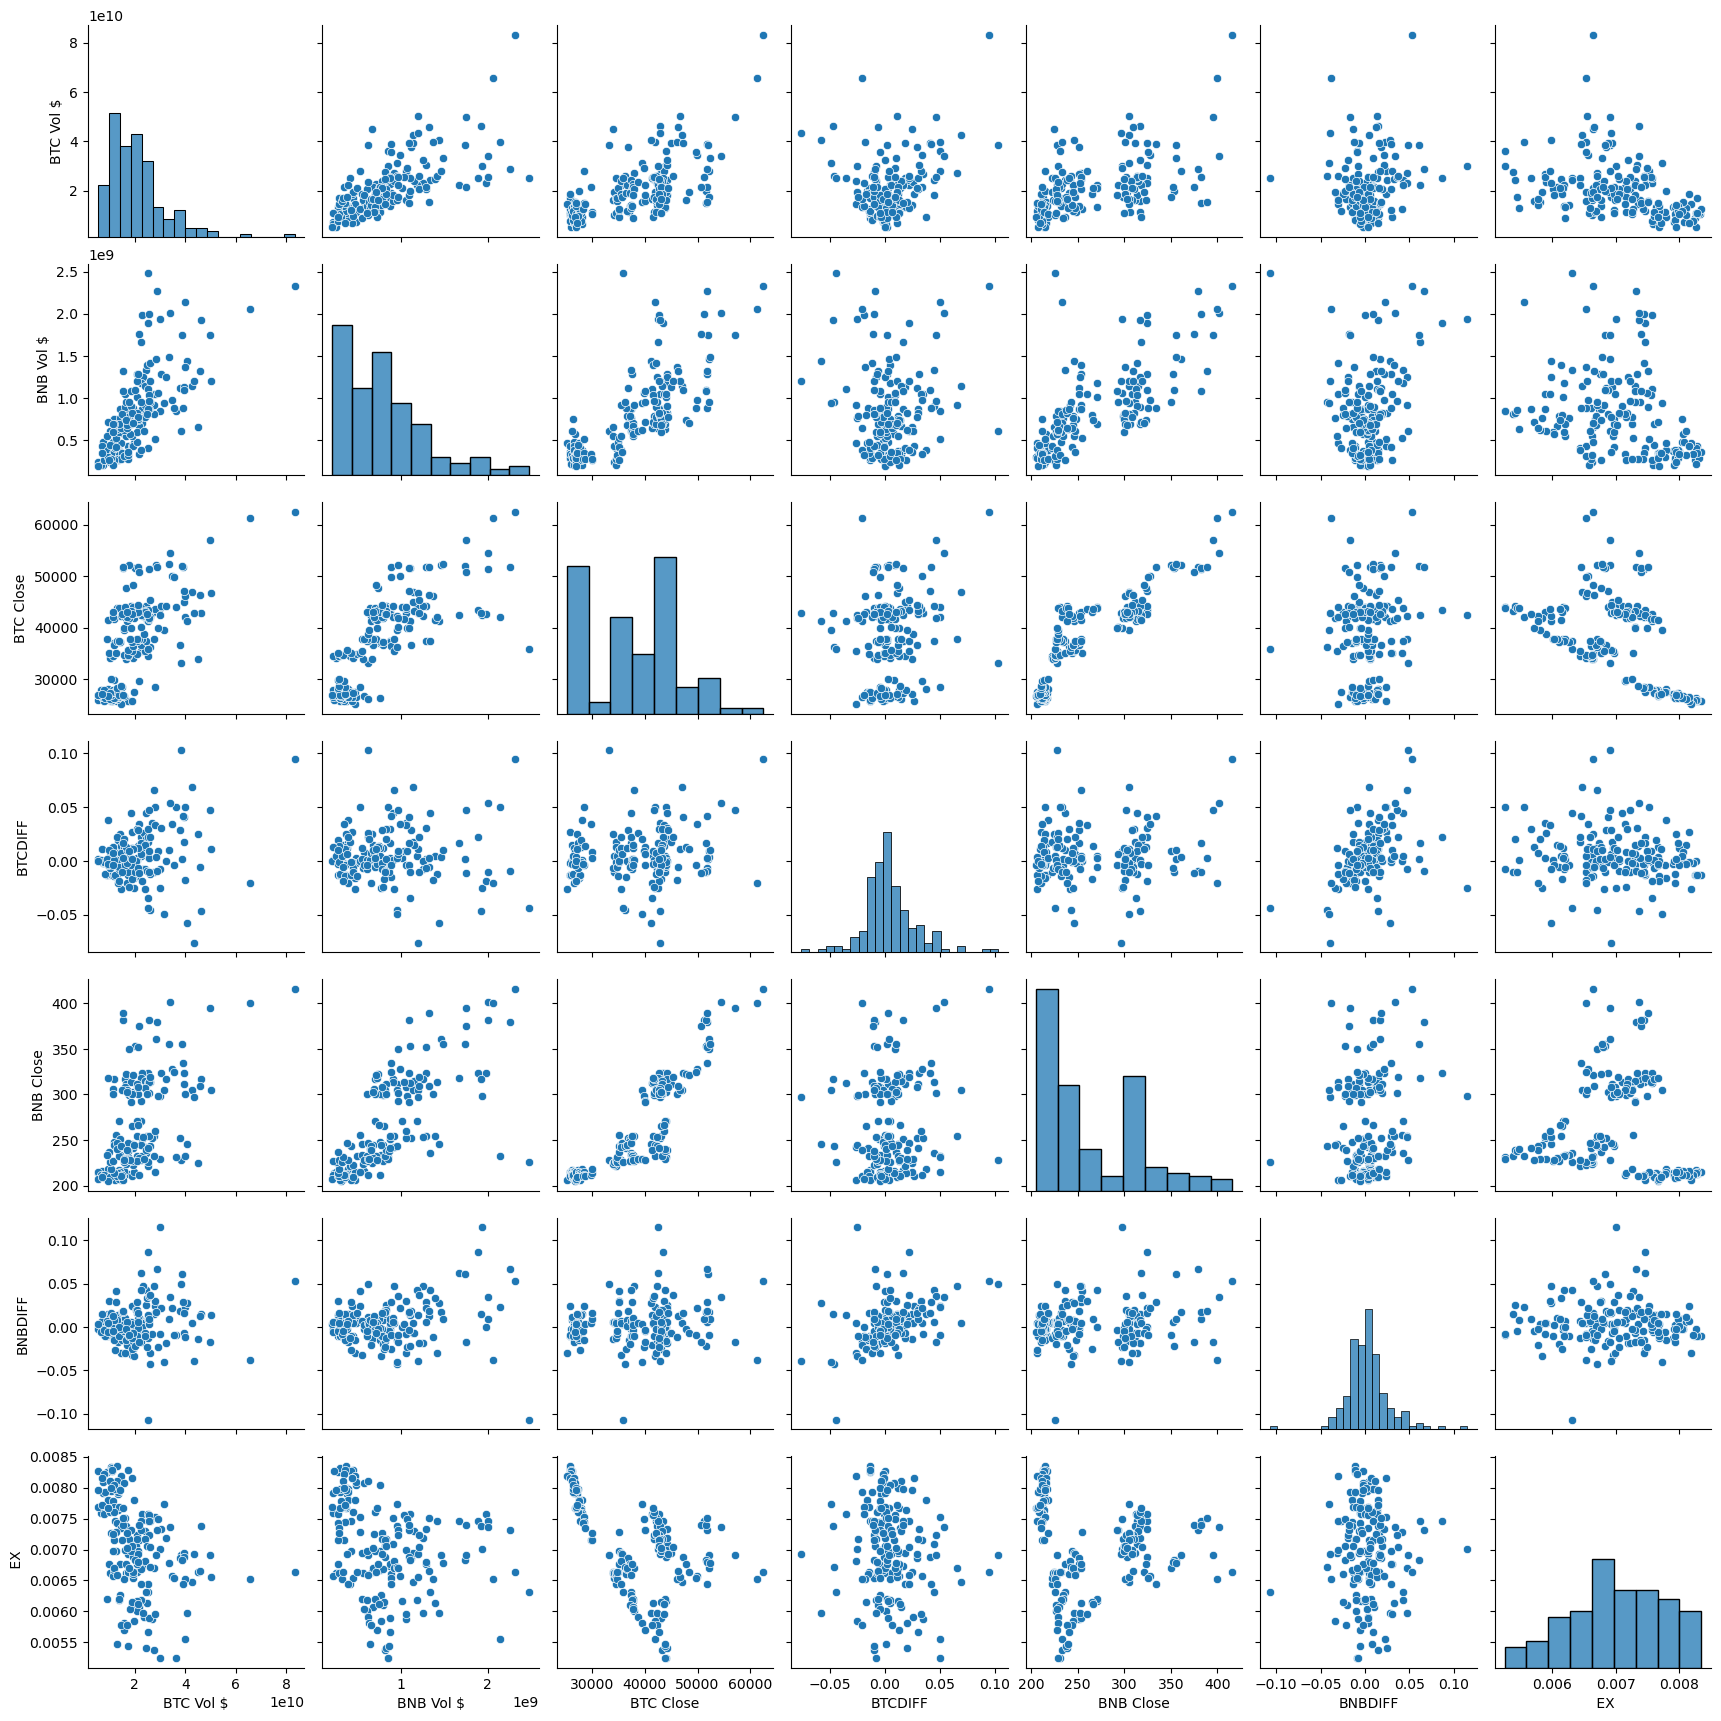

In [42]:
sns.pairplot(data=df);
#Lets take a look at the relationships of different variables. As we can see there already a postiive relationsahip between BTC  and BNB volume

In [58]:
#We Are specifically interested in the exchange rate however, so lets plot it
# First lets set the day as index 
# I has issued separating the variable here. In the interest of time I created a different table

In [89]:
os.chdir('C:\\Users\Boris\Desktop\Homework')
df = pd.read_csv('BNBEX.csv')
df.head()

,Date,Value
0,2023-09-01,0.008279
1,2023-09-02,0.008290
2,2023-09-03,0.008252
3,2023-09-04,0.008335
4,2023-09-05,0.008318


In [90]:
df['Date'] = pd.to_datetime(df['Date'])

In [91]:
df.set_index('Date',inplace = True)

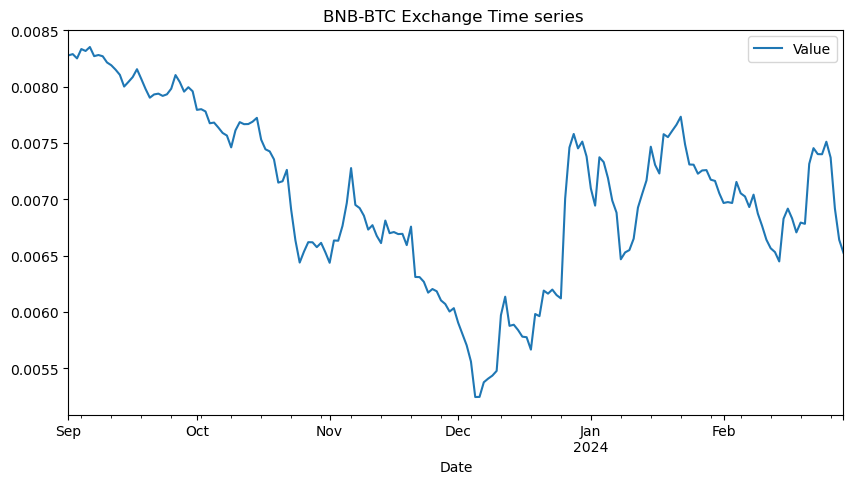

In [92]:
df.plot(figsize = (10,5))
plt.title('BNB-BTC Exchange Time series ')
plt.show()

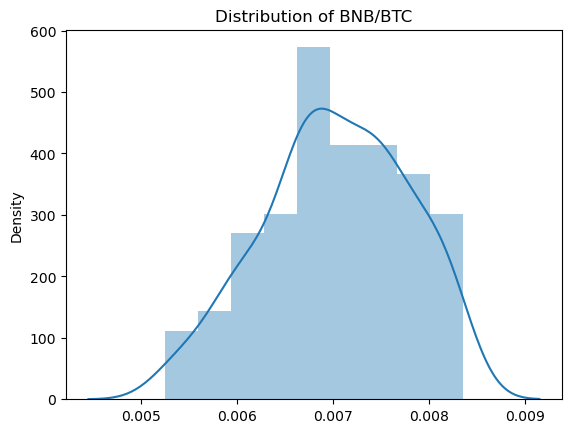

In [93]:
#Lets see the distribution
sns.distplot(df)
plt.title('Distribution of BNB/BTC')
plt.show()

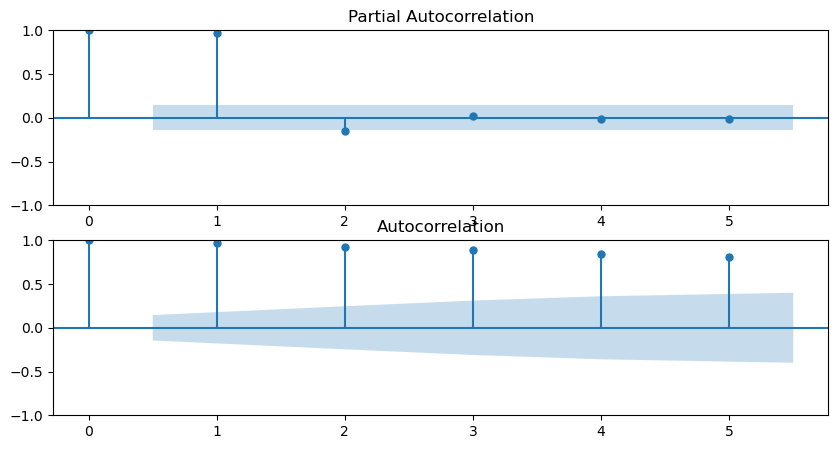

In [94]:
# We can that the data is roughly normally distributed although it is scewed. IF we had more data it would most likely
#look more normally distributed
#Now lets check for autocorrelation
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = plot_pacf(df , lags = 5 , ax = ax1)
ax2 = plot_acf(df , lags = 5 , ax = ax2)
plt.show()

In [66]:
#Now we need to check if the data is stationary in order to exclude the effect of seasonality.
# For this we use the Dickley-Fuller test. 
#If the p val is less that or = to 0.05 there is evidence against the null hypthesis and the series is stanionary.

In [95]:
# Define the test
def adf_check(time_series):
    result = adfuller(time_series , autolag = 'AIC')
    label = pd.Series(result[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in result[4].items():
        label['Critical Value (%s)'%key] = value
    print(label)
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary')
    else:
        print ('Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary ')

In [96]:
adf_check(df)

Test Statistic                  -2.148301
p-value                          0.225541
Number of Lags Used              1.000000
Number of Observations Used    180.000000
Critical Value (1%)             -3.467211
Critical Value (5%)             -2.877735
Critical Value (10%)            -2.575403
dtype: float64
Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary 


In [97]:
#Hmm this means there is seasonality present. What if we resample the dataset with first difference to make it stationary

df1 = df.diff().dropna()
print('Count of weekly First Difference',df1.shape[0])
df1.head()
adf_check(df1)

Count of weekly First Difference 181
Test Statistic                -1.104795e+01
p-value                        5.165916e-20
Number of Lags Used            0.000000e+00
Number of Observations Used    1.800000e+02
Critical Value (1%)           -3.467211e+00
Critical Value (5%)           -2.877735e+00
Critical Value (10%)          -2.575403e+00
dtype: float64
Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary


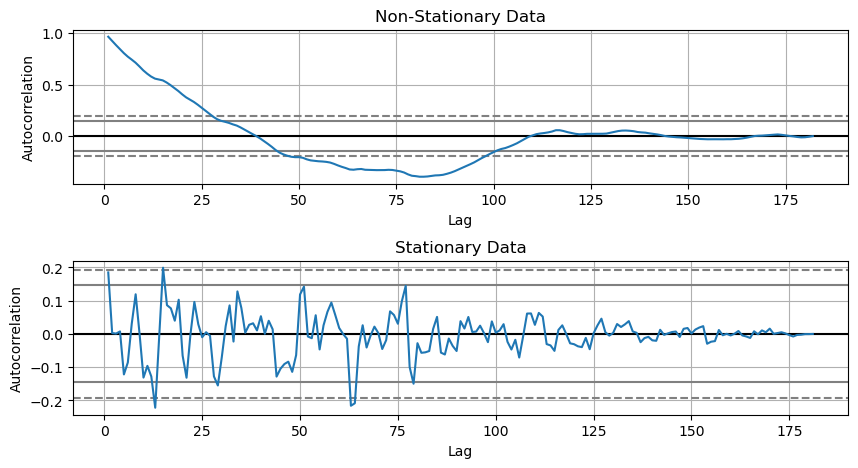

In [98]:
#Right now that we can assume the data is not affected by seasonality. 
#Lets see how our data looks stationary vs non stationary

fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = autocorrelation_plot(df , ax = ax1)
ax1.set_title('Non-Stationary Data')
ax2 = autocorrelation_plot(df1 , ax = ax2)
ax2.set_title('Stationary Data')
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [99]:
#We need to fit the model for the p and q values using Auto-arima function.
# For this model we will AIC - Auaike Information Criterion
model = auto_arima(df, m = 52, d = 1 ,seasonal = False , max_order = 8 , test = 'adf' , trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2627.838, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2635.848, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2640.129, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2640.300, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2637.229, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2638.307, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2638.240, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2629.844, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-2641.834, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-2639.850, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-2639.850, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-2641.688, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-2631.223, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.944 seconds


In [100]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  182
Model:               SARIMAX(0, 1, 1)   Log Likelihood                1322.917
Date:                Tue, 05 Mar 2024   AIC                          -2641.834
Time:                        10:24:55   BIC                          -2635.437
Sample:                    09-01-2023   HQIC                         -2639.241
                         - 02-29-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1947   1.86e-19   1.04e+18      0.000       0.195       0.195
sigma2      2.595e-08   1.38e-09     18.814      0.000    2.32e-08    2.86e-08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               316.75
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.70   Skew:                             1.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [101]:
# Now lets fit Arima with the Best value  we got from the auto_arima.

model = ARIMA(df, order = (0,1,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                  182
Model:                 ARIMA(0, 1, 1)   Log Likelihood                1322.917
Date:                Tue, 05 Mar 2024   AIC                          -2641.834
Time:                        10:24:57   BIC                          -2635.437
Sample:                    09-01-2023   HQIC                         -2639.241
                         - 02-29-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1947   1.86e-19   1.04e+18      0.000       0.195       0.195
sigma2      2.595e-08   1.38e-09     18.814      0.000    2.32e-08    2.86e-08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               316.75
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.70   Skew:                             1.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

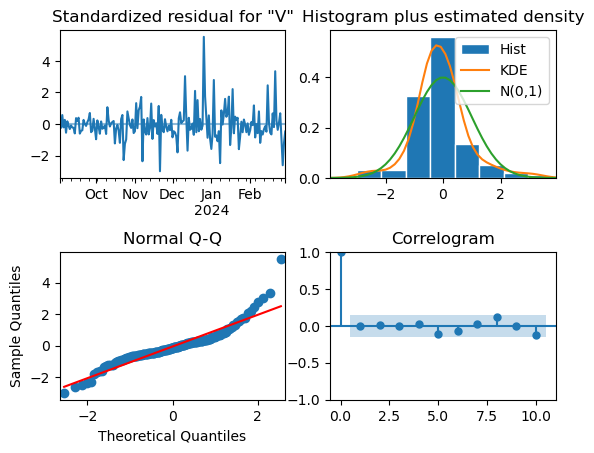

In [102]:
# Now lets plot the model
result.plot_diagnostics()
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [103]:
# Now try predicting the value with the new data
predictions = result.predict(typ = 'levels')

In [86]:
print('Evaluation Result for whole data : ','\n')
print('R2 Score for whole data : {0:.2f} %'.format(100*r2_score(df['Value'],predictions)),'\n')
print('Mean Squared Error : ',mean_squared_error(df['Value'],predictions),'\n')
print('Mean Absolute Error : ',mean_absolute_error(df['Value'],predictions),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(df['Value'],predictions)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df['Value'],predictions)))

Evaluation Result for whole data :  

R2 Score for whole data : 28.14 % 

Mean Squared Error :  4.0269866421423755e-07 

Mean Absolute Error :  0.0001548670227467822 

Root Mean Squared Error :  0.0006345854270421261 

Mean Absolute Percentage Error : 2.15 %


In [87]:
# Lets display the resulting data 

In [104]:
Final_data = pd.concat([df,df1,predictions],axis=1)
Final_data.columns = ['BNB-BTC Exchange','First Difference','Predicted Exchange']
Final_data.head()

,BNB-BTC Exchange,First Difference,Predicted Exchange
2023-09-01,0.008279,NaN,0.000000
2023-09-02,0.008290,0.000011,0.008279
2023-09-03,0.008252,-0.000038,0.008292
2023-09-04,0.008335,0.000083,0.008244
2023-09-05,0.008318,-0.000017,0.008353


In [105]:
# Now lets test the model with training data and test data.

size = int(len(df)*0.80)
train , test = df[0:size]['Value'] , df[size:(len(df))]['Value']
print('Counts of Train Data : ',train.shape[0])
print('Counts of Train Data : ',test.shape[0])

Counts of Train Data :  145
Counts of Train Data :  37


In [106]:
# We will create the list of training values in train_values as well as predictions. 
# This list we will then later append after the prediction
#We will then use the best fit values with Arima in the train_values and predict the best value.
# We will then print a predictions list


In [107]:
train_values = [x for x in train]
prediction = []
print('Printing Predictied vs Expected Values....')
print('\n')
for t in range(len(test)):
    model = ARIMA(train_values , order = (0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred_out = output[0]
    prediction.append(float(pred_out))
    test_in = test[t]
    train_values.append(test_in)
    print('Predicted = %f , Actual = %f' % (pred_out , test_in))

Printing Predictied vs Expected Values....


Predicted = 0.007447 , Actual = 0.007310
Predicted = 0.007287 , Actual = 0.007308
Predicted = 0.007312 , Actual = 0.007228
Predicted = 0.007214 , Actual = 0.007257
Predicted = 0.007264 , Actual = 0.007260
Predicted = 0.007259 , Actual = 0.007175
Predicted = 0.007161 , Actual = 0.007164
Predicted = 0.007165 , Actual = 0.007054
Predicted = 0.007035 , Actual = 0.006968
Predicted = 0.006956 , Actual = 0.006976
Predicted = 0.006979 , Actual = 0.006968
Predicted = 0.006966 , Actual = 0.007155
Predicted = 0.007188 , Actual = 0.007054
Predicted = 0.007032 , Actual = 0.007026
Predicted = 0.007025 , Actual = 0.006932
Predicted = 0.006917 , Actual = 0.007042
Predicted = 0.007062 , Actual = 0.006874
Predicted = 0.006844 , Actual = 0.006764
Predicted = 0.006751 , Actual = 0.006642
Predicted = 0.006624 , Actual = 0.006566
Predicted = 0.006556 , Actual = 0.006532
Predicted = 0.006528 , Actual = 0.006449
Predicted = 0.006436 , Actual = 0.006828
Predicted = 

In [108]:
# Now lets evaluate the model with standart metrics like: 
# r square, 
# mean square, 
# mean absolute error, 
# mean absolute percentage error
# Although I understand that due to limited amount of data the values are doing to be off, I will continue the test anyway

In [109]:
print('Evaluation Result for Test data : ','\n')
print('R2 Score for Test data : {0:.2f} %'.format(100*r2_score(test,prediction)),'\n')
print('Mean Squared Error : ',mean_squared_error(test,prediction),'\n')
print('Mean Absolute Error : ',mean_absolute_error(test,prediction),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(test,prediction)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(test,prediction)))

Evaluation Result for Test data :  

R2 Score for Test data : 68.68 % 

Mean Squared Error :  2.550531417067901e-08 

Mean Absolute Error :  0.0001099213937119252 

Root Mean Squared Error :  0.00015970383267373083 

Mean Absolute Percentage Error : 1.57 %


In [110]:
# As we can see our model is very erroneous. 
# According to r2 our data only explain 69% of the data
# MAPE is not zero but is very close
# MSE forecast is poor. Closer to 0 means fewer unaccounted data and better predictor
# MAE shows that our predictions are not too far off as the average between value and predictor is close to zero
# RMSE likewise shows that our prediction error is low

In [111]:
# Now lets replace test data with prediction data and plot them
predictions_df = pd.Series(prediction, index = test.index)

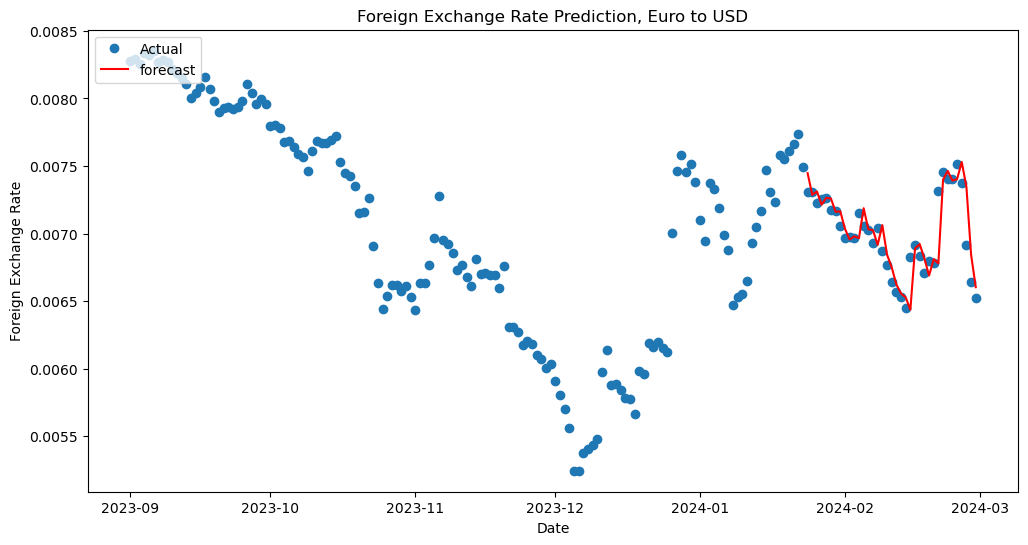

In [113]:
plt.rcParams['figure.figsize'] = (12,6)
fig, ax = plt.subplots()
ax.set(title='Foreign Exchange Rate Prediction, Euro to USD', xlabel='Date', ylabel='Foreign Exchange Rate')
ax.plot(df, 'o', label='Actual')
ax.plot(predictions_df, 'r', label='forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')

In [ ]:
# As we can see we have built a good prediction model for the data despite its poor availability.
# This is by no means full-proof model and doesnt account for the many exogenous factors as well the underlying covariance
# of the two currencies.
